### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from functions import players_list, load_data, passes_plot
from mplsoccer import Pitch, VerticalPitch, FontManager

### Finding match specific data

In [2]:
match = "matches/liv_manu.json"
data = load_data(match)

### Initializing Player and Event Data

In [3]:
players = players_list(data)
events = pd.DataFrame(data["events"])

In [4]:
players

,players_id,player_name
0,340105,Lisandro MartÃ­nez
1,437022,Alejandro Garnacho
2,114397,Fred
3,69344,Christian Eriksen
4,93206,RaphaÃ«l Varane
5,122366,Anthony Martial
6,345303,Tyrell Malacia
7,275035,Donny van de Beek
8,123761,Bruno Fernandes
9,5583,Cristiano Ronaldo


### Pass Analysis

In [5]:
passes = events[events["type"] == {'value': 1, 'displayName': 'Pass'}]
passes.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY',
       'goalMouthZ', 'goalMouthY', 'isShot', 'isGoal', 'cardType'],
      dtype='object')

In [6]:
pass_degea = passes[passes["playerId"] == 79554]

In [7]:
df_succ_pass = passes[passes["outcomeType"] == {'value': 1, 'displayName': 'Successful'}]
df_unsucc_pass = passes[passes["outcomeType"] == {'value': 0, 'displayName': 'Unsuccessful'}]

df_degea_succ_pass = pass_degea[pass_degea["outcomeType"] == {'value': 1, 'displayName': 'Successful'}]
df_degea_unsucc_pass = pass_degea[pass_degea["outcomeType"] == {'value': 0, 'displayName': 'Unsuccessful'}]

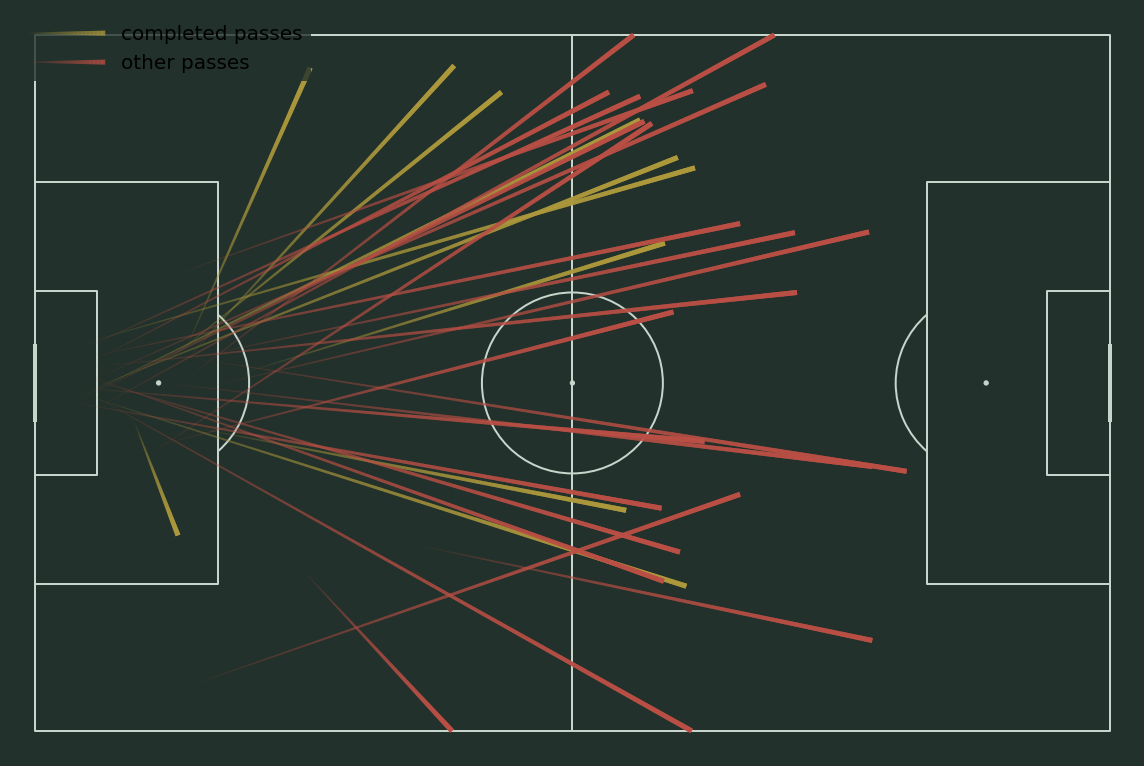

In [8]:
passes_plot(df_degea_succ_pass, df_degea_unsucc_pass)

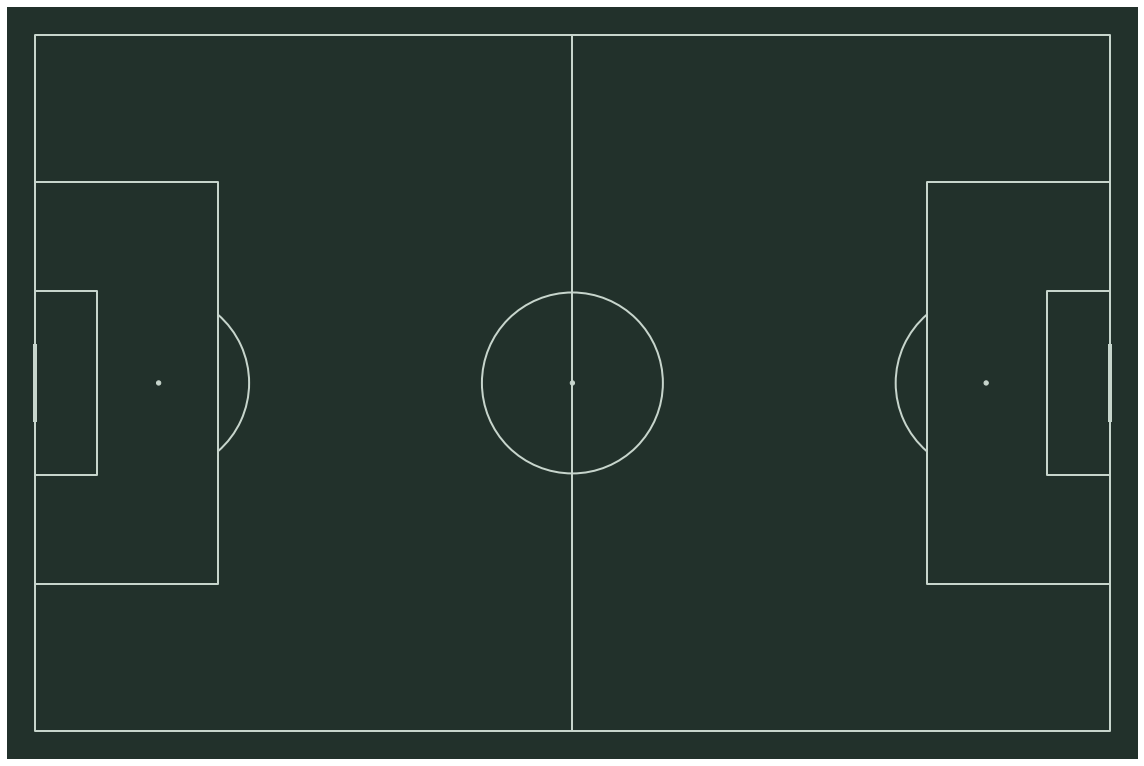

In [9]:
pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)

In [10]:
pitch

Pitch(pitch_type='opta', half=False, pitch_color='#22312b', line_color='#c7d5cc', linewidth=2, line_zorder=0.9, linestyle=None, stripe=False, stripe_color='#c2d59d', stripe_zorder=0.6, pad_left=2.5904761904761906, pad_right=2.5904761904761906, pad_bottom=4, pad_top=4, positional=False, positional_zorder=0.8, positional_linewidth=2, positional_linestyle=None, positional_color='#eadddd', shade_middle=False, shade_color='#f2f2f2', shade_zorder=0.7, pitch_length=None, pitch_width=None, goal_type='line', goal_alpha=1, line_alpha=1, label=False, tick=False, axis=False, spot_scale=0.002, corner_arcs=False)

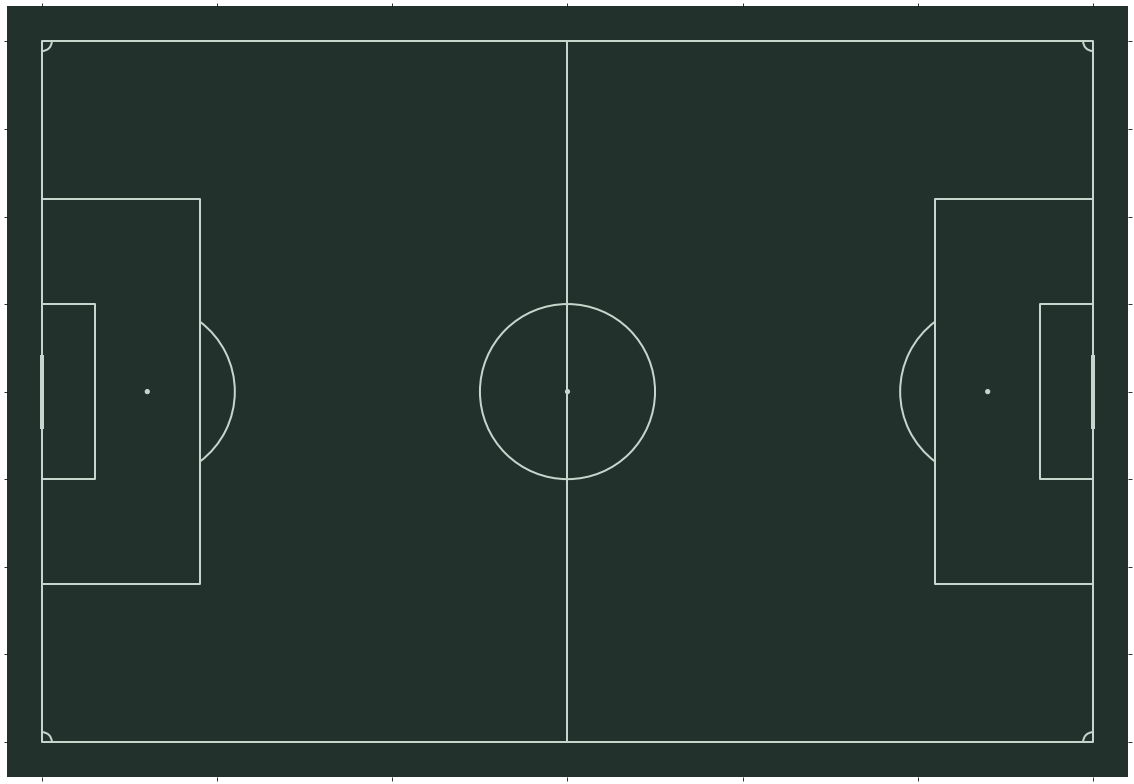

### Shots

In [12]:
## Create a dataframe for goals, misses, woodwork

In [20]:
df_shots = events[events["isShot"] == True].copy()

In [21]:
df_shots.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType
72,2.449979e+09,37,3,20.0,32,84.4,64.4,3,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 15, 'displayName': 'SavedShot'}",...,NaN,36.0,123761.0,85.6,63.4,19.0,51.4,True,NaN,NaN
130,2.449980e+09,76,7,13.0,32,81.0,74.7,7,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 15, 'displayName': 'SavedShot'}",...,NaN,NaN,NaN,85.6,68.8,19.0,50.5,True,NaN,NaN
165,2.449981e+09,90,9,32.0,32,83.1,56.7,9,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 14, 'displayName': 'ShotOnPost'}",...,NaN,89.0,123761.0,NaN,NaN,5.1,44.5,True,NaN,NaN
284,2.449983e+09,145,15,5.0,32,89.2,52.4,15,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 16, 'displayName': 'Goal'}",...,NaN,143.0,413211.0,NaN,NaN,3.2,53.8,True,True,NaN
318,2.449984e+09,190,18,0.0,26,84.1,47.0,18,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 13, 'displayName': 'MissedShots'}",...,NaN,188.0,363982.0,NaN,NaN,26.4,42.4,True,NaN,NaN


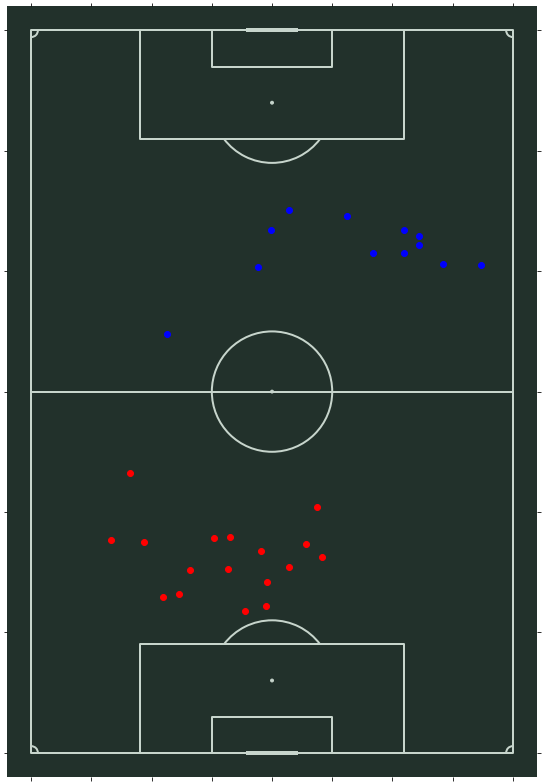

In [59]:
df_shots_liv = df_shots[df_shots["teamId"] == 32]
df_shots_manu = df_shots[df_shots["teamId"] == 26]

pitch = VerticalPitch(pitch_color='#22312b', line_color='#c7d5cc',corner_arcs=True, tick=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)

pitch.scatter(df_shots_liv["x"], df_shots_liv["y"], ax=ax, color='blue')
pitch.scatter(120 - df_shots_manu["x"], 80 - df_shots_manu["y"], ax=ax, color='red')
plt.show()